# **Let's play with randomness**

We will simulate:
- A coin toss (count heads)
- Two coins toss (count heads)
- A dice roll
- Two dice roll
- Same sex chindren
- Sum of uniform distributions

## Tossing a single coin

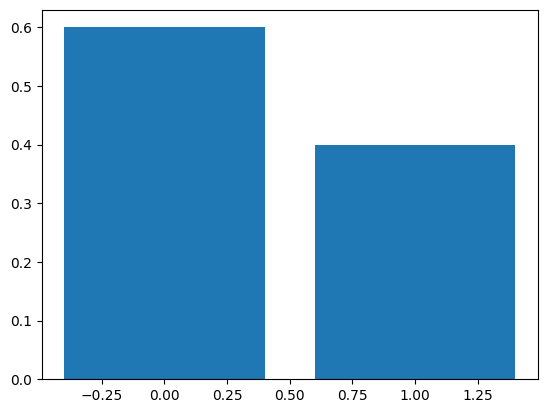

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def bernoulli(prob=0.5):
    # Tossing a single coin
    # prob: probability of success
    if np.random.rand() < prob:
        return 1  # success
    else:
        return 0  # failure

n = 100
coin = np.array([0, 0])
for i in range(n):
    coin[bernoulli()] += 1  # increment in 1 according to bern result
coin = coin / n
p = plt.bar(range(2), coin)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Tossing two coins



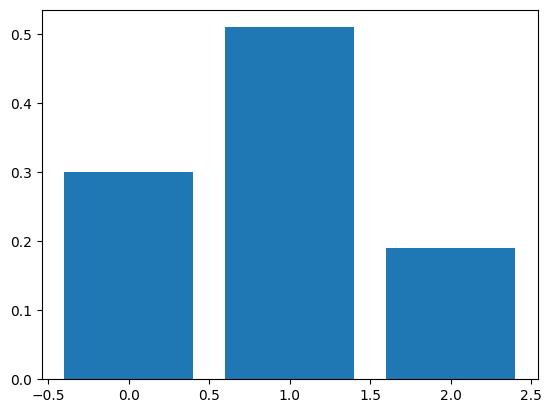

In [2]:
n = 100
two_coins = np.array([0, 0, 0])
for i in range(n):
    two_coins[bernoulli() + bernoulli()] += 1
two_coins = two_coins / n
p = plt.bar(range(3), two_coins)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Let's roll a dice

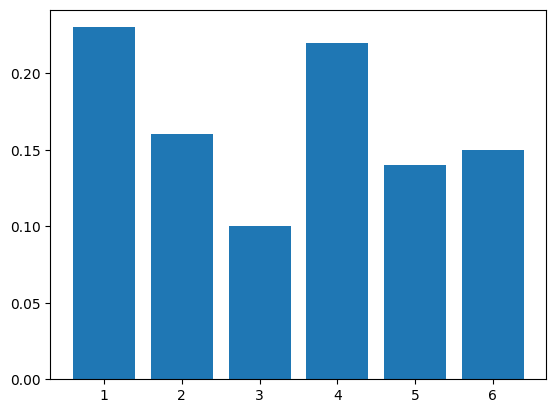

In [3]:
n = 100
dice = np.zeros(6)
for i in range(n):
    di = int(np.floor(np.random.rand()*6))
    dice[di] += 1
dice = dice / n
p = plt.bar(range(1,7), dice)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Two dices

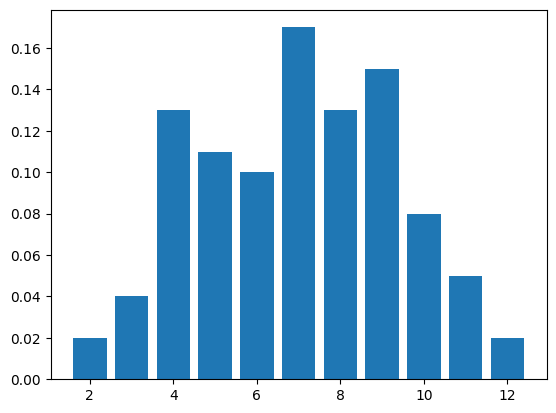

In [4]:
n = 100
dice = np.zeros(11)
for i in range(n):
    di1 = int(np.floor(np.random.rand()*6))
    di2 = int(np.floor(np.random.rand()*6))
    dice[di1+di2] += 1
dice = dice / n
p = plt.bar(range(2,13), dice)

Let's try with $n\in [1000, 10000, 100000, 1000000]$

## Probability of having three kids of the same sex

**Assignment 1**: How likely is it that a family with three children has all boys or all girls?
Let's assume that a child is equally likely to be a boy or a girl. Instead of observing the result of actual births, a toss of a fair coin could be used to simulate a birth. If the toss results in heads (H), then we could say a boy was born; if the toss results in tails (T), then we could say a girl was born. If the coin is fair (*i.e.*, heads and tails are equally likely), then getting a boy or a girl is equally likely.

In [5]:
rep = 100000
## WRITE YOUR CODE HERE
child = 0
for i in range(rep):
    n = bernoulli(0.5) + bernoulli(0.5) + bernoulli(0.5)
    if n == 0 or n == 3:
        child += 1

total = child/rep

print(f"Total childs: {total}")
## --------------------

Total childs: 0.25049


## Sum of continuos uniforms

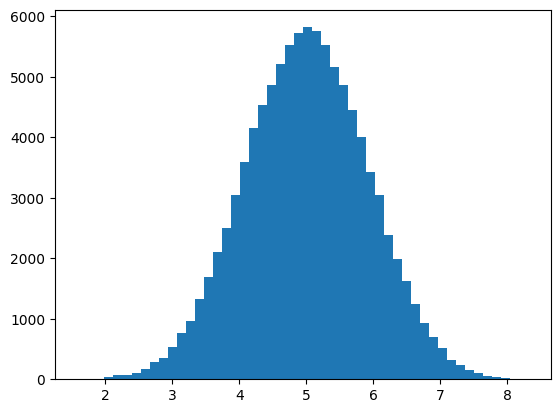

In [6]:
n = 100000  # Sequence length
nu = 10     # number of uniforms in the sum

x = []
for i in range(n):
    x += [sum([np.random.rand() for i in range(nu)])]
p = plt.hist(x, bins=50)

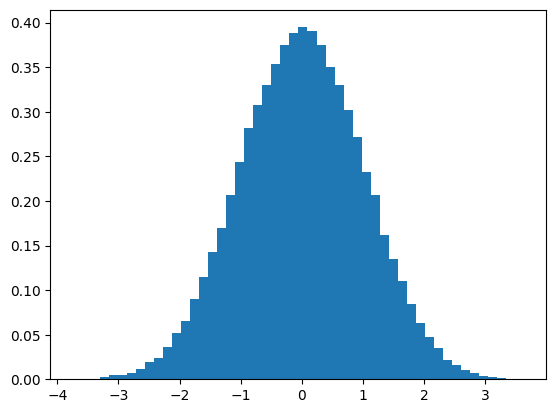

In [7]:
x = np.array(x)
z = (x - np.mean(x))/np.std(x)
p = plt.hist(z, bins=50, density=True)

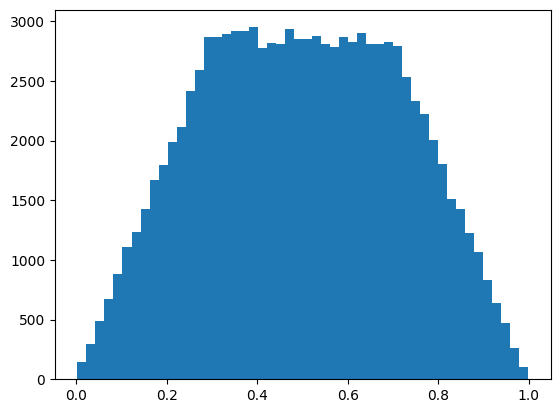

In [8]:
n = 100000  # Sequence length
x = []
for i in range(n):
    x += [0.3*np.random.rand() + 0.7*np.random.rand()]
p = plt.hist(x, bins=50)

## A simple game

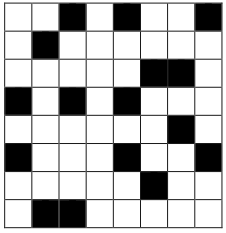

**Assigment 2**: Considering the board shown above, implement the following system: There are 2 mines distributed randomly in the black squares, and the player clicks randomly on the squares (never on the white ones): If there is no mine in the square, it becomes white, otherwise the player loses the game.
If the player manages to click all the squares that do not have a mine, he/she win the game.  Do not take into account the distribution (or proximity) of the black boxes.

In [9]:
## WRITE YOUR CODE HERE
import random

def Minas(tablero=np.zeros(64), intentos=16, minas=2, negras=16):
    if tablero is None:
        tablero = np.zeros(64, dtype=int)

    # Configurar el tablero
    trampa = 0
    ganadas = 0
    click = 0

    for i in range(len(tablero)):
        if trampa < minas:
            tablero[i] = bernoulli()
            if tablero[i] == 1 and negras > 0:
                trampa += 1
                negras -= 1
                tablero[i] = 2

    # Jugar
    for i in range(intentos):
        aleatorio = random.randint(0, 63)
        if tablero[aleatorio] == 1:
            click -= 1
            intentos += 1
        elif tablero[aleatorio] == 0:
            intentos -= 1
            click += 1
        else:
            break

    if intentos == 0:
        ganadas += 1

    return ganadas, click

resultados = Minas()
print(f"Total de partidas ganadas: {resultados[0]} y clicks {resultados[1]}")
## --------------------

Total de partidas ganadas: 0 y clicks 4


**Assignment 3**: What is the probability of winning the game?


In [10]:
## WRITE YOUR CODE HERE
intentos = 1000000
wins = 0
for i in range(intentos):
    intento = Minas()[0]
    if intento == 1:
        wins += 1

total = (100 * wins)/intentos

print(f"La probabilidad de ganar es {total}")
## --------------------

La probabilidad de ganar es 4.6817


**Assigment 4**: How many clicks on average will a player make until they lose (include the click in which they find the mine)?

In [26]:
## WRITE YOUR CODE HERE
num_games = 10000  # You can adjust the number of games as needed
total_clicks = sum(Minas()[1] for _ in range(num_games))
average_clicks = total_clicks / num_games

print(f"Numeros de clicks dados: {average_clicks} en promedio")
## --------------------

Numeros de clicks dados: 3.6031 en promedio
